연습문제12-01

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 20.3 MB/s eta 0:00:00


In [4]:
from konlpy.tag import Okt
okt = Okt()
text = "나는 자연어 처리를 배운다"
tagged_text = okt.pos(text)
print(tagged_text)
tokenized_text = okt.morphs(text)
print(tokenized_text)

[('나', 'Noun'), ('는', 'Josa'), ('자연어', 'Noun'), ('처리', 'Noun'), ('를', 'Josa'), ('배운다', 'Verb')]
['나', '는', '자연어', '처리', '를', '배운다']


연습문제12-02

In [5]:
import nltk
from konlpy.tag import Okt
from collections import Counter

# 가사 불러오기
with open('/content/연습12-02.txt', 'r', encoding='utf-8') as f: lyrics = f.read()
# 텍스트 데이터 전처리
lyrics = lyrics.replace('\n', ' ')  # 개행 문자 제거

# 형태소 분석기 초기화
okt = Okt()

# 품사 태깅과 형태소 분석 수행
pos = okt.pos(lyrics)
nouns = [word for word, tag in pos if tag == 'Noun']

# 가장 많이 언급된 명사 5개 출력
top_nouns = Counter(nouns).most_common(5)
for noun, freq in top_nouns:
    print(f'{noun}: {freq}회')

누구: 16회
누: 13회
때: 9회
척도: 6회
굴착기: 6회


연습문제12-03

In [11]:
from konlpy.tag import Okt
from collections import Counter
# 노래 가사
# 가사 불러오기
with open('/content/연습12-03.txt', 'r', encoding='utf-8') as f: lyrics = f.read()
# 텍스트 데이터 전처리
lyrics = lyrics.replace('\n', ' ')  # 개행 문자 제거
stopword=['순','수만','안','노','땐','줄','가지','것들이','해']
# 품사 태깅과 형태소 분석 수행
pos =okt.pos(lyrics)  
print(pos)    
filter_token=[word for word in pos if word[0] not in stopword]
nouns = [word for word, tag in filter_token if tag == 'Noun'] #명사만 추출

# 가장 많이 언급된 명사 5개 출력
top_nouns = Counter(nouns).most_common(5)
for noun, freq in top_nouns:
    print(f'{noun}: {freq}회')


[('밤하늘', 'Noun'), ('빛나는', 'Verb'), ('수만', 'Noun'), ('가지', 'Noun'), ('것', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('이미', 'Adverb'), ('죽어', 'Verb'), ('버린', 'Verb'), ('행성', 'Noun'), ('의', 'Josa'), ('잔해', 'Noun'), ('라면', 'Noun'), ('고개', 'Noun'), ('를', 'Josa'), ('들어', 'Verb'), ('경의', 'Noun'), ('를', 'Josa'), ('표', 'Noun'), ('하기보단', 'Verb'), ('허리', 'Noun'), ('를', 'Josa'), ('숙여', 'Verb'), ('흙', 'Noun'), ('을', 'Josa'), ('한', 'Verb'), ('움큼', 'Noun'), ('집어', 'Verb'), ('들래', 'Verb'), ('방', 'Noun'), ('안', 'Noun'), ('에', 'Josa'), ('가득히', 'Adjective'), ('내', 'Noun'), ('가', 'Josa'), ('사랑', 'Noun'), ('을', 'Josa'), ('했던', 'Verb'), ('사람', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('액자', 'Noun'), ('안', 'Noun'), ('에서', 'Josa'), ('빛나고', 'Verb'), ('있어', 'Adjective'), ('죽어서', 'Verb'), ('이름', 'Noun'), ('을', 'Josa'), ('어딘가', 'Noun'), ('남', 'Noun'), ('기기', 'Noun'), ('보단', 'Josa'), ('살아서', 'Verb'), ('그', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('이름', 'Noun'), ('을', 'Josa'), ('한번', 'Noun'), ('더', 'Noun'), ('불러', 

In [14]:
from konlpy.tag import Okt
from collections import Counter
temp_list=[]
with open('/content/연습12-03.txt', 'r', encoding='utf-8') as f: lyrics = f.read()
# 텍스트 데이터 전처리
lyrics = lyrics.replace('\n', ' ')  # 개행 문자 제거
stopword=['순','수만','안','노','땐','줄','가지','것들이','해']
s_list=okt.pos(lyrics)
for word,tag in s_list:
  if word not in stopword:
    if tag in ['Noun']:
      temp_list.append(word)
counts=Counter(temp_list)
tag=counts.most_common(5)
tag

[('이름', 3), ('너', 2), ('저을', 2), ('몇', 2), ('분', 2)]

연습문제12-04

In [17]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
temp_list=[]
df=pd.read_excel('/content/연습12-04.xlsx')
df['본문'] = df['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

for sentence in df['본문']:
  s_list=okt.pos(sentence)
  for word,tag in s_list:
    if tag in ['Noun']:
      temp_list.append(word)
counts=Counter(temp_list)
tag=counts.most_common(20)
tag


<ipython-input-17-3f9cd39f913a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['본문'] = df['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


[('챗', 2550),
 ('지능', 2204),
 ('인공', 2177),
 ('일', 1358),
 ('챗봇', 1030),
 ('것', 894),
 ('등', 875),
 ('기술', 802),
 ('오픈', 783),
 ('서비스', 779),
 ('대화', 727),
 ('미국', 682),
 ('수', 648),
 ('구글', 633),
 ('기업', 629),
 ('년', 609),
 ('개발', 560),
 ('기자', 527),
 ('세계', 503),
 ('시간', 501)]

연습문제12-05

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


<ipython-input-21-2690062f8424>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['본문'] = df['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


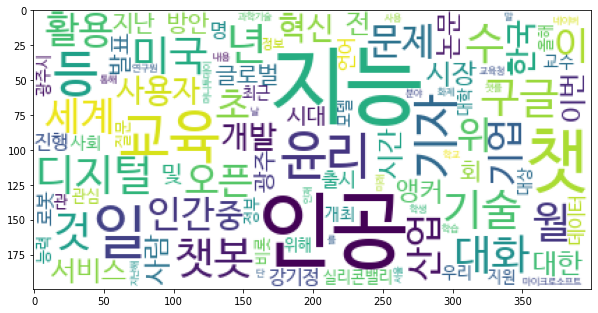

In [21]:
! apt-get install fonts-nanum
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

temp_list=[]
df=pd.read_excel('/content/연습12-05.xlsx')
df['본문'] = df['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

for sentence in df['본문']:
  s_list=okt.pos(sentence)
  for word,tag in s_list:
    if tag in ['Noun']:
      temp_list.append(word)
counts=Counter(temp_list)
tag=counts.most_common(100)


#워드클라우드 생성
wc=WordCloud(font_path=font_path,background_color='white', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

#워드클라우드 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)